In [87]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_im

#jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

### weivull 분포에서 확률 계산하기


In [4]:
#weivull 분포에서 확률 계산하기
#형성모수(alpha) :2.2 척도모수(beta) 1200에서 1500시간 이상 작동 확률

x = 1500
alpha = 2.2
beta = 1200

#누적확률 값 계산
prob = stats.weibull_min.cdf(x, alpha, scale= beta)
print("P(X >= x): {:.3f}".format((1-prob)))

P(X >= x): 0.195


### 이항 분포


In [7]:
n = 3
for i in range(n+1):
    #이항분포 probability Mass Function
    prob = stats.binom.pmf(k=i, n = n , p = 0.4)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


### 포아송 분포


In [10]:
#평균
m = 2

#1분당 3번의 전화가 걸려올 확률
prob = stats.poisson.pmf(3,m)
print("1분당 {0}번의 전화가 걸려올 확률: {1:.1f}".format(3, prob*100))

#1분당 최대 2회 이하의 전화가 걸려올 확률
cdf_prob = stats.poisson.cdf(2, m)
print("1분당 최대 {0}번 이하의 전화가 걸려올 확률: {1:.1f}".format(2, cdf_prob*100))

1분당 3번의 전화가 걸려올 확률: 18.0
1분당 최대 2번 이하의 전화가 걸려올 확률: 67.7


### 정규성 검정

In [18]:
from scipy.stats import shapiro

In [20]:
ds_camshaft = pd.read_csv('/home/piai/test/Daily/csv/camshaft.csv', engine = 'python')
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [22]:
data1 = ds_camshaft['Supp1']

#정규성 검정: shapiro-Wilk Test
statistic, p = stats.shapiro(data1)
print('Shapiro-Wilk Test: statistic = {}, p-value = {}'.format(statistic, p))

Shapiro-Wilk Test: statistic = 0.9788156747817993, p-value = 0.10744144767522812


### 모평균 구간추정

In [30]:
df = pd.DataFrame({'sample':[3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
df.head()

lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale= 0.397/np.sqrt(40))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57],[2.82])


### 모평균 신뢰구간 추정 - 모표준편차를 모르는 경우


In [38]:
df = pd.DataFrame({'sample':[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})

lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df),scale = scipy.stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39],[55.33])


### 평균검정(모집단 표준편차를 모르는 경우)

In [45]:
df = pd.DataFrame({'sample': [74.5, 81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})

t_result = stats.ttest_1samp(df, 76.7)
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [0.864]
p-value : [0.41]


### 2 sample t-test

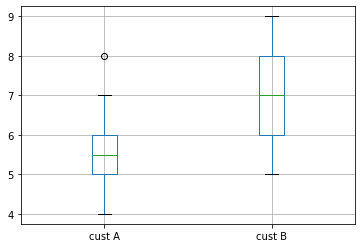

In [49]:
df = pd.read_csv("/home/piai/Downloads/2sample.csv", engine = 'python')

df.boxplot(['cust A', 'cust B'])

#t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

#print('2-Sample t-test')
#print("t:{}".format(t))
#print("p:{}".format(p))

In [60]:
# cust A 정규성 검정

statistic, p = stats.shapiro(df['cust A'])
print('statistic = {}, p-value = {}'.format(statistic, p))
print('정규성 만족')

statistic = 0.9094840288162231, p-value = 0.06230909377336502
정규성 만족


In [59]:
# cust B 정규성 검정

statistic, p = stats.shapiro(df['cust B'])
print('statistic = {}, p-value = {}'.format(statistic, p))
print('정규성 만족')

statistic = 0.9119446873664856, p-value = 0.06941930204629898
정규성 만족


In [56]:
#equal variance test

stats.levene(df['cust A'], df['cust B'])

print(stats.levene(df['cust A'], df['cust B']))
print()
print('p-value가 0.83이므로 두 집단의 분산은 같다고 할 수 있다')

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

p-value가 0.83이므로 두 집단의 분산은 같다고 할 수 있다


In [66]:
# 2-sample t-test
t_result = stats.ttest_ind(df['cust A'], df['cust B'], equal_var = True)

# 2-sample t-test의 t,p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

#2-sample t-test의 t,p값 출력
print("2-Sample t-test")
print(f"t검정통계량: {t}")
print(f"p-value : {p}")
print('결론: 유의수준 5%에서 검정결과 p값이 0.001 이므로 고객간에 고객만족도의 차이가 있다.')

2-Sample t-test
t검정통계량: -3.596
p-value : 0.001
결론: 유의수준 5%에서 검정결과 p값이 0.001 이므로 고객간에 고객만족도의 차이가 있다.


### paired t-test

In [70]:
df = pd.read_csv('/home/piai/Downloads/paired.csv', engine = 'python')
df.head()

,before,after
0,720,810
1,589,670
2,780,790
3,648,712
4,720,810


In [80]:
#paired t-test
t_result = stats.ttest_rel(df['before'],df['after'])

#paired t-test 의 t,p 값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

#paired t-test의 t,p값 출력
print('Paired t-test')
print('t검정 통계량 = %.3f, pvalue = %.3f'% t_result)
print()
print('유의수준 5%에서 검정결과 p값이 0.000이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.')

Paired t-test
t검정 통계량 = -5.324, pvalue = 0.000

유의수준 5%에서 검정결과 p값이 0.000이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.


### 1 proportion test

In [85]:
#가설 설정
#Ho : p = 0.1
#H1 : p != 0.1

#변수 선언
count = 15
n_obs = 100
value = 0.1

#proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

#proportion test 결과 출력
print('1 Proportion test')
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))
print()
print('결과적으로 고급강 A제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 없다.')

1 Proportion test
z:1.400
p:0.161

결과적으로 고급강 A제품에 대해 품질개선 결과 기존 대비 사용비율이 차이가 있다고 할 수 없다.


### 2 proportion test

In [89]:
#가설 설정
#Ho : p1 = p2
#H1: p1 != p2

#변수 선언
count = np.array([4,1])
N_obs = np.array([1000,1200])

#proportion test 실행
stat, pval = proportions_ztest(count, n_obs)

#proportion test 결과 출력
print('2 Proportion test')
print('z검정통계량:{0:0.3f}'.format(stat))
print('p-value:{0:0.3f}'.format(pval))

print(f'pvalue가 {pval}로 0.05보다 크므로 두 공장의 불량룰은 차이가 있다고 할 수 없다')

2 Proportion test
z검정통계량:1.359
p-value:0.174
pvalue가 0.17423138824802498로 0.05보다 크므로 두 공장의 불량룰은 차이가 있다고 할 수 없다
